# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

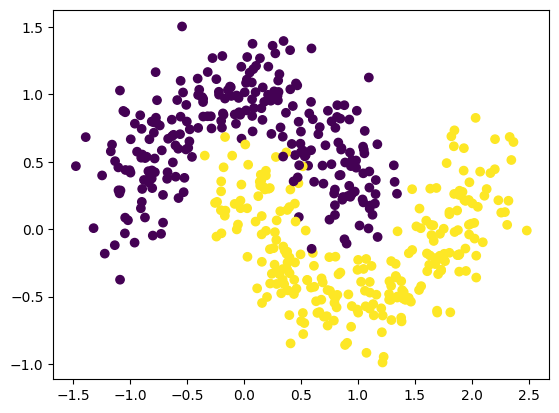

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

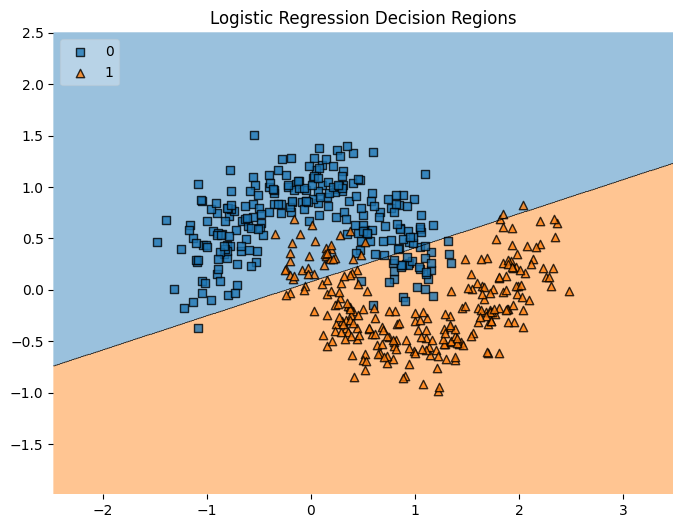

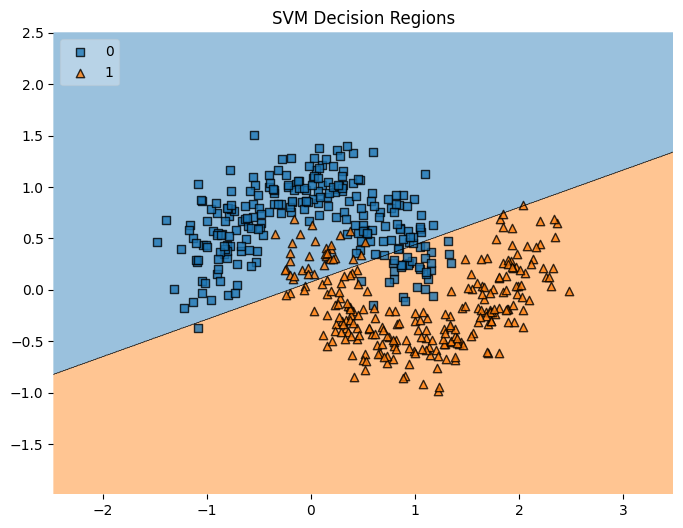

Accuracy of Logistic Regression: 0.86
Accuracy of SVM: 0.86


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5) # add some params
svm = SVC(kernel='linear', C=0.5) # here too

### YOUR CODE HERE
X_test, y_test = moons_points[100:], moons_labels[100:]
X_train, y_train = moons_points[:100], moons_labels[:100]

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

def plot_decisions(X, y, model, title):
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X, y, clf=model, legend=2)
    plt.title(title)
    plt.show()

plot_decisions(moons_points, moons_labels, lr, "Logistic Regression Decision Regions")
plot_decisions(moons_points, moons_labels, svm, "SVM Decision Regions")

print(f"Accuracy of Logistic Regression: {accuracy_lr:.2f}")
print(f"Accuracy of SVM: {accuracy_svm:.2f}")

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

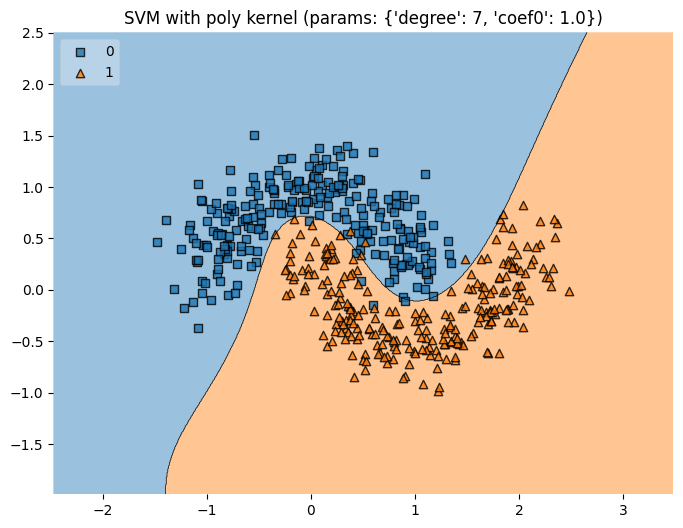

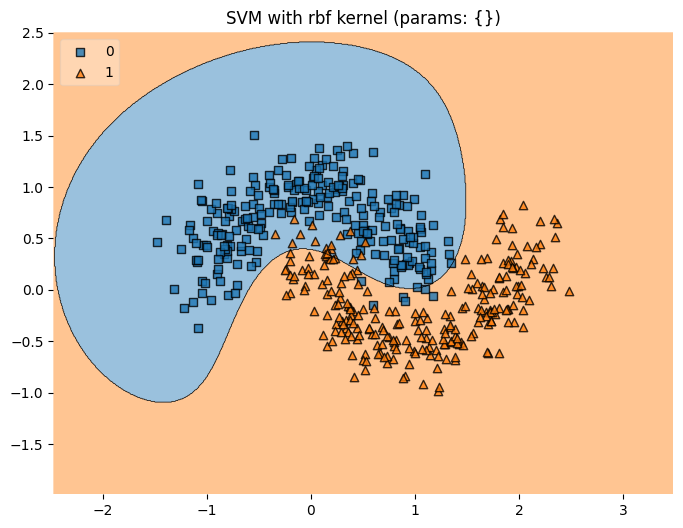

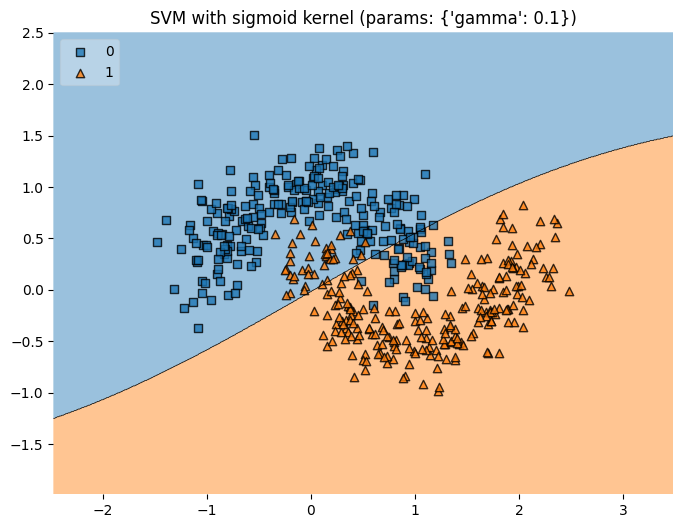

Accuracy with poly kernel: 0.98
Accuracy with rbf kernel: 0.96
Accuracy with sigmoid kernel: 0.83


In [72]:
### YOUR CODE HERE
def evaluate_svc_kernel(X_train, y_train, X_test, y_test, kernel, **kwargs):
    svc = SVC(kernel=kernel, **kwargs)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    plot_decisions(moons_points, moons_labels, svc, f"SVM with {kernel} kernel (params: {kwargs})")
    
    return accuracy

results = {}
kernels = ['poly', 'rbf', 'sigmoid']
for kernel in kernels:
    if kernel == 'poly':
        results[kernel] = evaluate_svc_kernel(X_train, y_train, X_test, y_test, kernel=kernel, degree=7, coef0=1.0)
    elif kernel == 'rbf':
        results[kernel] = evaluate_svc_kernel(X_train, y_train, X_test, y_test, kernel=kernel)
    elif kernel == 'sigmoid':
        results[kernel] = evaluate_svc_kernel(X_train, y_train, X_test, y_test, kernel=kernel, gamma=0.1)

for kernel, accuracy in results.items():
    print(f"Accuracy with {kernel} kernel: {accuracy:.2f}")

Качество классификации улучшилось при использовании ядер rbf и poly, потому что их нелинейная граница между классами лучше подошла для этих данных. граница между классами при использовании ядра sigmoid слабо отличается от линейной.
Я выбрал параметр degree=7, так как при этом значении граница достаточно сложна, чтобы хорошоразделить классы, а при больших значениях модель может переобучиться. С увеличением degree качество классификации может возрастать на обучающей выборке, но ухудшаться на тестовой.

## 1.3 Simpler solution (of a kind)
What if we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

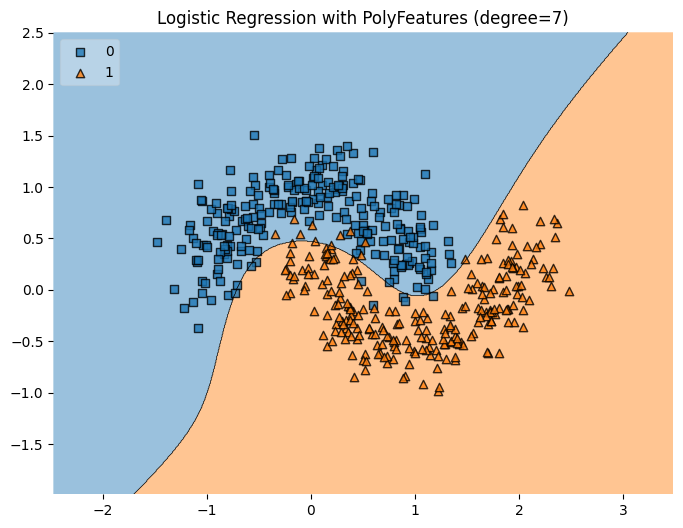

Accuracy of Logistic Regression with PolynomialFeatures (degree=7): 0.96


In [81]:
from sklearn.preprocessing import PolynomialFeatures

### YOUR CODE HERE
from sklearn.pipeline import Pipeline
def evaluate_lr_with_poly_features(X_train, y_train, X_test, y_test, degree):
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('lr', LogisticRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    plot_decisions(moons_points, moons_labels, pipeline, f"Logistic Regression with PolyFeatures (degree={degree})")
    
    return accuracy

degree = 7
accuracy_lr_poly = evaluate_lr_with_poly_features(X_train, y_train, X_test, y_test, degree)

print(f"Accuracy of Logistic Regression with PolynomialFeatures (degree={degree}): {accuracy_lr_poly:.2f}")

Получены сопоставимые с результатами SVC с ядрами poly и rbf по качеству результаты. Граница решений логистической регрессии с полиномиальными признаками напоминает poly ядро в SVM, поскольку обе модели включают полиномиальные зависимости. Использовался параметр degree=7, как и в SVC.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

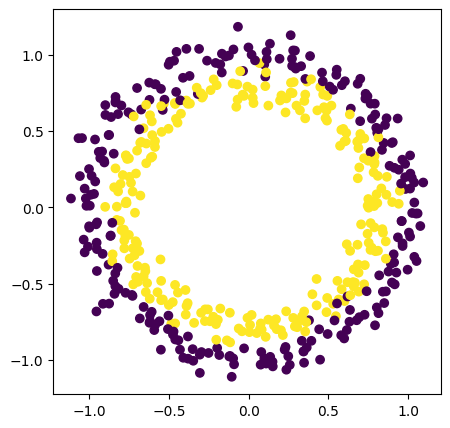

In [82]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

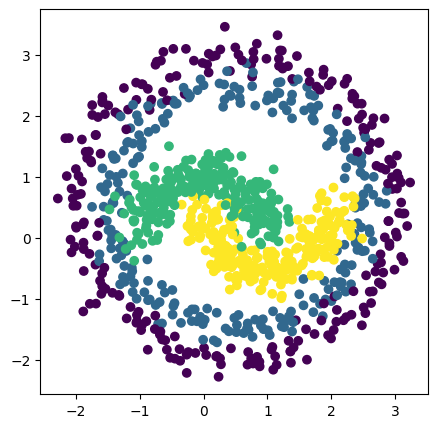

In [83]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

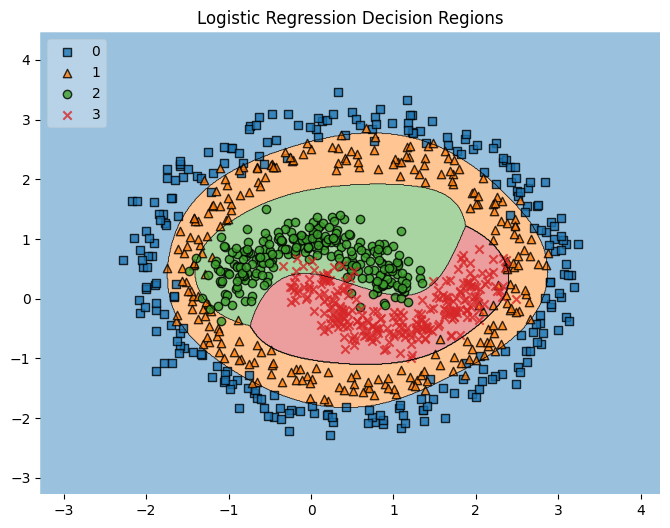

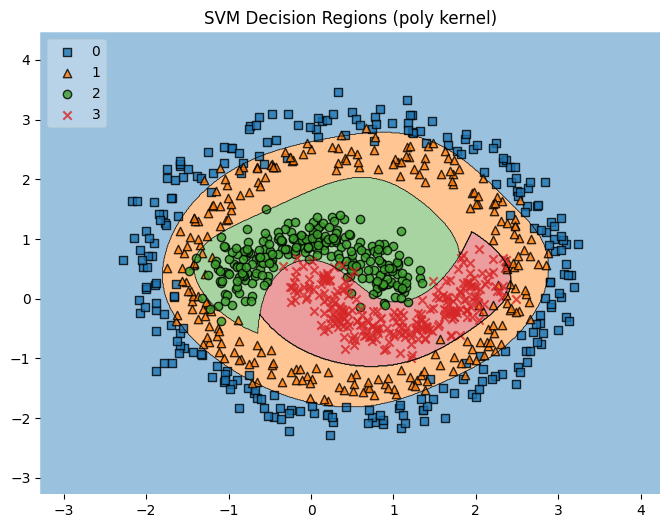

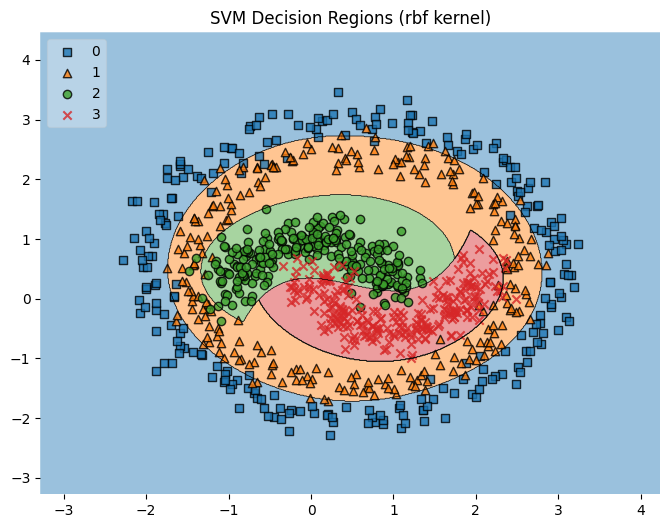

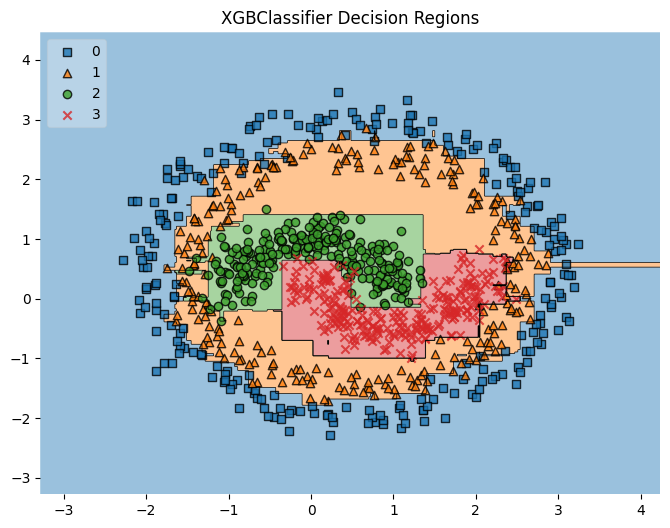

Accuracy of Logistic Regression: 0.90
Accuracy of SVM with poly kernel: 0.91
Accuracy of SVM with rbf kernel: 0.91
Accuracy of XGBClassifier: 0.90


In [101]:
### YOUR CODE HERE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')


X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.2, stratify=labels, random_state=42)


lr = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=6)),
        ('lr', LogisticRegression(max_iter=500))
    ])
svm_poly = SVC(kernel='poly', degree=7, coef0=1.0)
svm_rbf = SVC(kernel='rbf')
xgb = XGBClassifier(n_estimators=300)


lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

svm_poly.fit(X_train, y_train)
y_pred_svm_poly = svm_poly.predict(X_test)
accuracy_svm_poly = accuracy_score(y_test, y_pred_svm_poly)

svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test)
accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

def plot_decisions(X, y, model, title):
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X, y, clf=model, legend=2)
    plt.title(title)
    plt.show()

plot_decisions(points, labels, lr, "Logistic Regression Decision Regions")
plot_decisions(points, labels, svm_poly, "SVM Decision Regions (poly kernel)")
plot_decisions(points, labels, svm_rbf, "SVM Decision Regions (rbf kernel)")
plot_decisions(points, labels, xgb, "XGBClassifier Decision Regions")


print(f"Accuracy of Logistic Regression: {accuracy_lr:.2f}")
print(f"Accuracy of SVM with poly kernel: {accuracy_svm_poly:.2f}")
print(f"Accuracy of SVM with rbf kernel: {accuracy_svm_rbf:.2f}")
print(f"Accuracy of XGBClassifier: {accuracy_xgb:.2f}")

Разница в точности между методами минимальна, так как каждый из методов способен достаточно хорошо моделировать нелинейные зависимости.